## Important Libraries

In [181]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE

## Read Data and Show it

In [2]:
data=pd.read_csv('survey lung cancer.csv')

In [3]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## Show Information of Data and its Description

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## Data Cleansing 

In [7]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [9]:
data.duplicated().sum()

33

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.duplicated().sum()

0

## Data Analysis and Visualization 

In [14]:
for col in data.columns:
    print(col)
    print(data[col].nunique())

GENDER
2
AGE
39
SMOKING
2
YELLOW_FINGERS
2
ANXIETY
2
PEER_PRESSURE
2
CHRONIC DISEASE
2
FATIGUE 
2
ALLERGY 
2
WHEEZING
2
ALCOHOL CONSUMING
2
COUGHING
2
SHORTNESS OF BREATH
2
SWALLOWING DIFFICULTY
2
CHEST PAIN
2
LUNG_CANCER
2


In [15]:
def Age_Range(value):
    if value <=10:
        return 'less than 10'
    elif 10<value<=20:
        return '10-20'
    elif 20<value<=30:
        return '20-30'
    elif 30<value<=40:
        return '30-40'
    elif 40<value<=50:
        return '40-50'
    elif 50<value<=60:
        return '50-60'
    else:
        return 'more than 60'
    

In [16]:
data['AGE_RANGE']=data['AGE'].apply(Age_Range)

In [17]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_RANGE
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,more than 60
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,more than 60
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,50-60
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,more than 60
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,more than 60


In [18]:
data['LUNG__CANCER']=data['LUNG_CANCER']

In [19]:
data.drop('LUNG_CANCER',axis=1,inplace=True)

In [20]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,AGE_RANGE,LUNG__CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,more than 60,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,more than 60,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,50-60,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,more than 60,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,more than 60,NO


In [21]:
len(data.columns)

17

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7952\3663064787.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('coolwarm')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7952\3663064787.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x='LUNG__CANCER',y=col,palette='coolwarm')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7952\3663064787.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('coolwarm')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7952

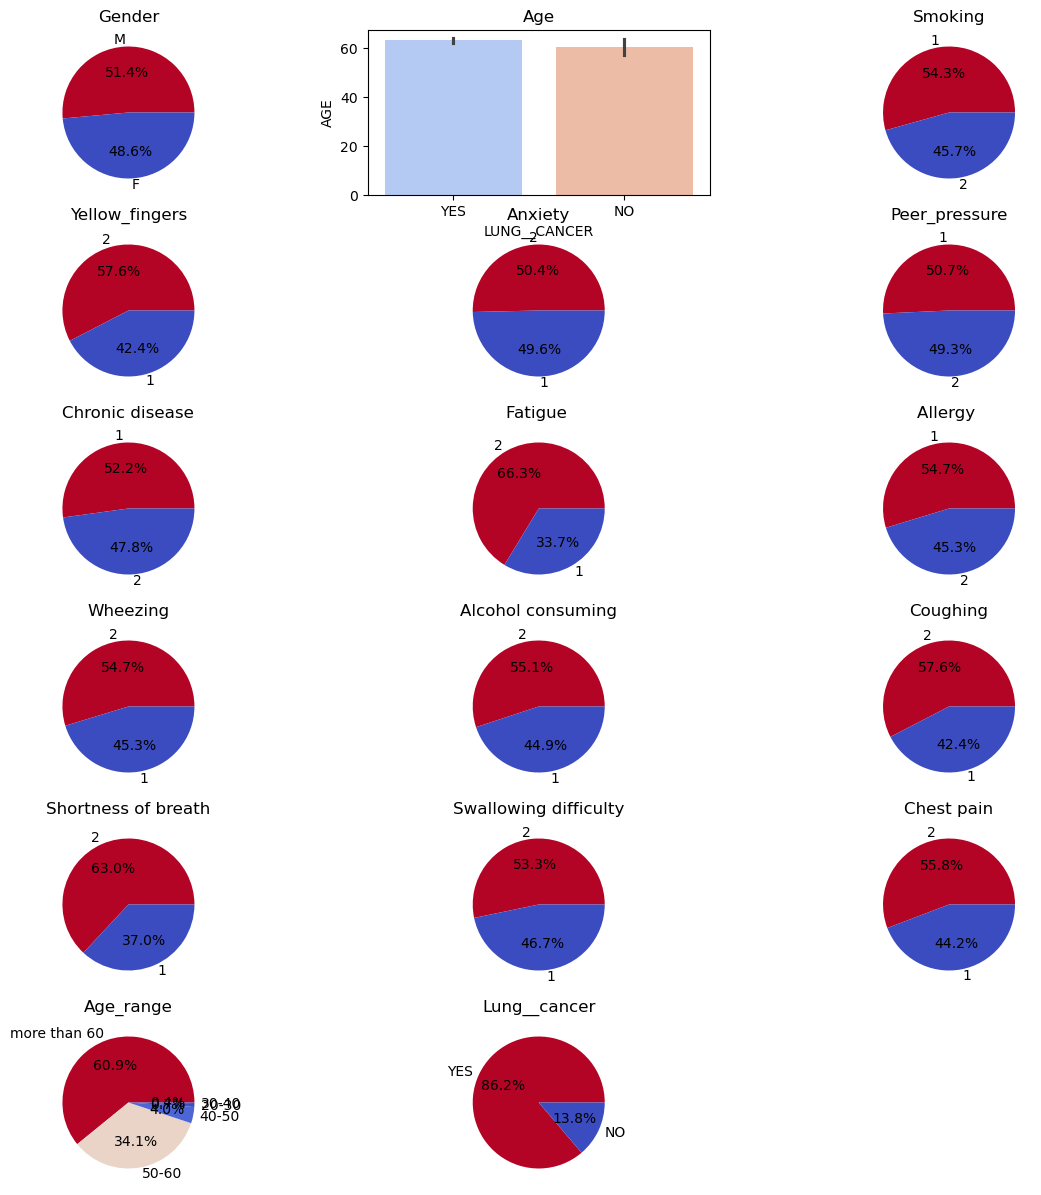

In [28]:
plt.figure(figsize=(15,15))
for col in data.columns:
    plt.subplot(6,3,list(data.columns).index(col)+1)
    plt.title(col.capitalize())
    if data[col].nunique()>10:
        sns.barplot(data=data,x='LUNG__CANCER',y=col,palette='coolwarm')
    else:
        cmap=cm.get_cmap('coolwarm')
        norm=plt.Normalize(min(data[col].value_counts()),max(data[col].value_counts()))
        colors=cmap(norm(data[col].value_counts())) 
        plt.pie(data=data,x=data[col].value_counts(),labels=data[col].unique(),colors=colors,autopct='%1.1f%%')
plt.show()           

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7952\57058149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='LUNG__CANCER',palette='coolwarm')


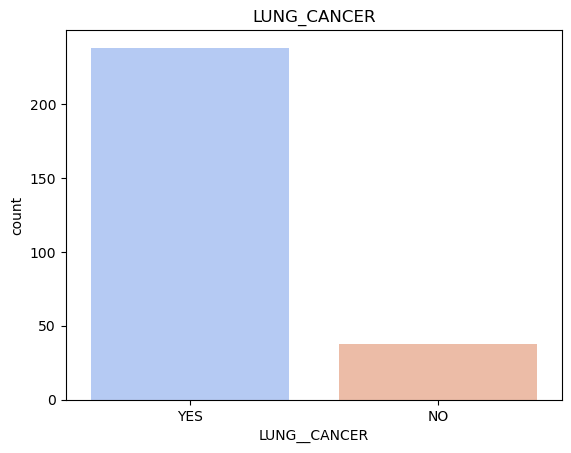

In [29]:
plt.title('LUNG_CANCER')
sns.countplot(data=data,x='LUNG__CANCER',palette='coolwarm')
plt.show()

## Data Preprocessing

In [31]:
def label_encoding(data):
    lbls={}
    for col in data.columns:
        if data[col].dtype=='object':
            label=LabelEncoder()
            data[col]=label.fit_transform(data[col])
            lbls[col]=label
    return data,lbls        

In [32]:
data,labels=label_encoding(data)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7952\3400419011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=data['AGE'],orient='h',palette='coolwarm')


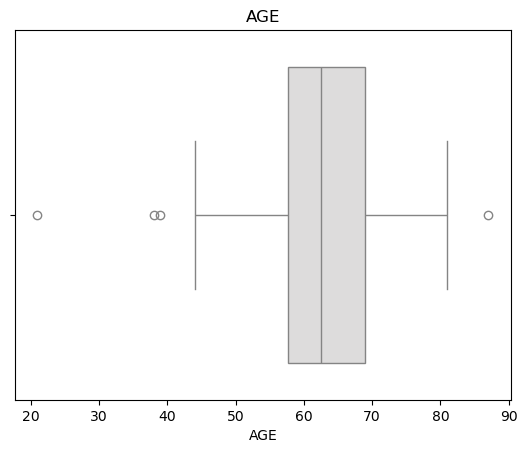

In [36]:
plt.title('AGE')
sns.boxplot(data=data,x=data['AGE'],orient='h',palette='coolwarm')
plt.show()

In [37]:
Q1=data['AGE'].quantile(0.25)
Q3=data['AGE'].quantile(0.75)
IQR=Q3-Q1
lower_fence=Q1-1.5*IQR
upper_fence=Q3+1.5*IQR
lower_outliers=data[data['AGE']<lower_fence]['AGE'].values
upper_outliers=data[data['AGE']>upper_fence]['AGE'].values
data['AGE'].replace(lower_outliers,lower_fence,inplace=True)
data['AGE'].replace(upper_outliers,upper_fence,inplace=True)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7952\1380673728.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['AGE'].replace(lower_outliers,lower_fence,inplace=True)


C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7952\3400419011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=data['AGE'],orient='h',palette='coolwarm')


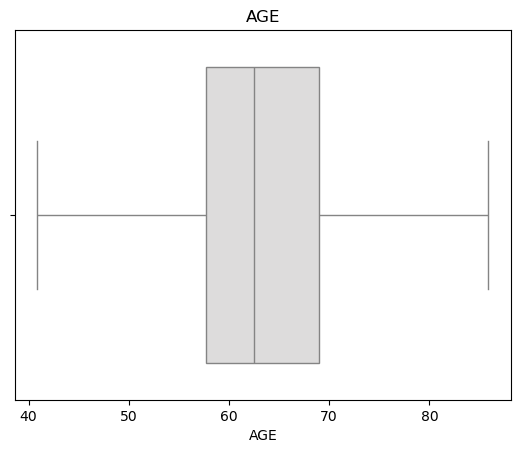

In [38]:
plt.title('AGE')
sns.boxplot(data=data,x=data['AGE'],orient='h',palette='coolwarm')
plt.show()

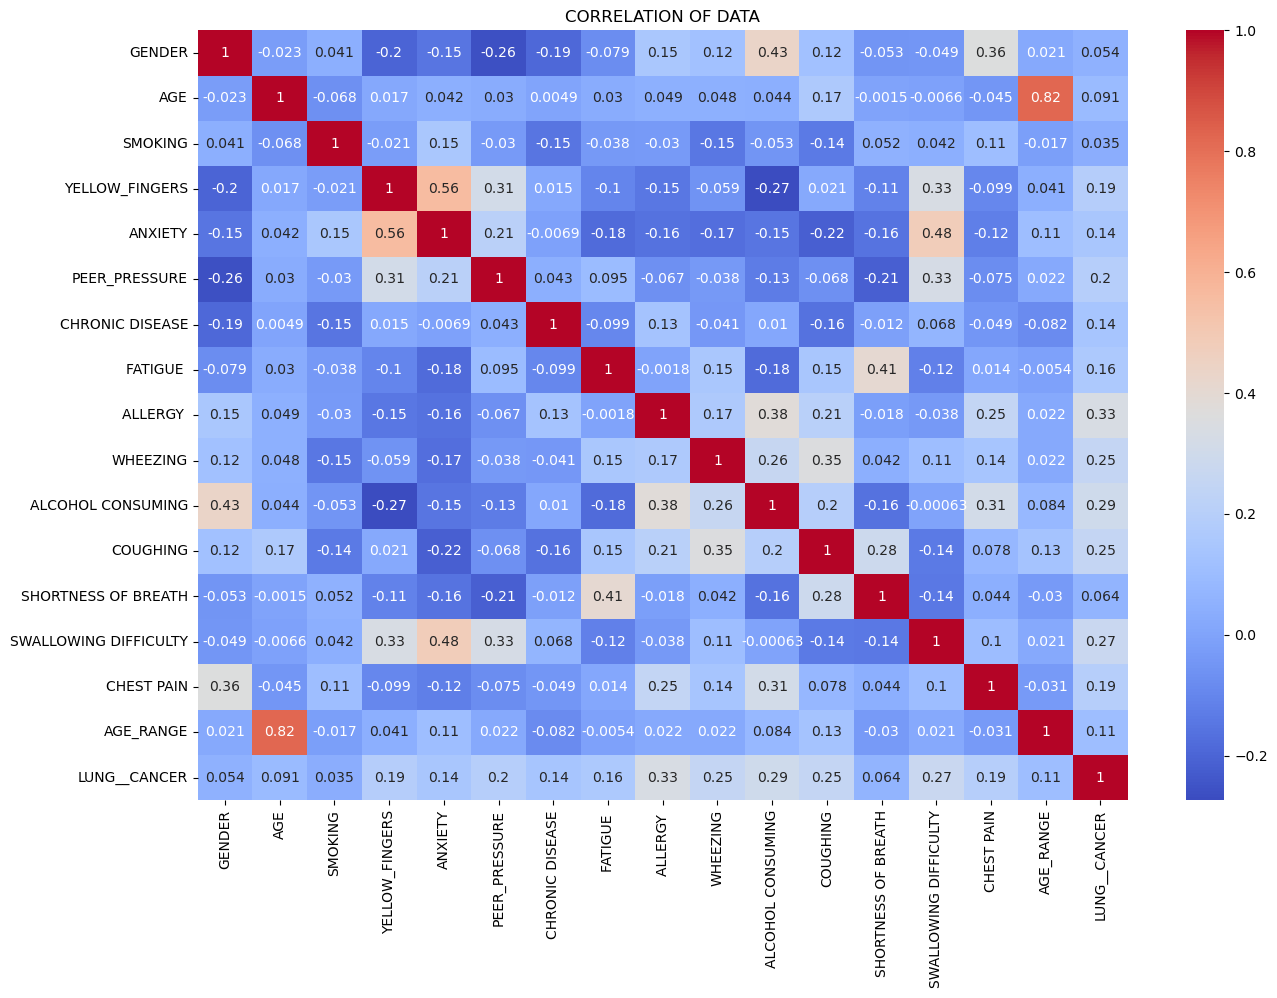

In [42]:
plt.figure(figsize=(15,10))
plt.title('CORRELATION OF DATA')
sns.heatmap(data=data.corr(),cmap='coolwarm',annot=True)
plt.show()

In [43]:
def drop_no_corr(data):
    for col in data.columns:
        if -0.1<=data[col].corr(data['LUNG__CANCER'])<=0.1:
            data.drop(col,axis=1,inplace=True)
    return data        

In [44]:
data=drop_no_corr(data)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   YELLOW_FINGERS         276 non-null    int64
 1   ANXIETY                276 non-null    int64
 2   PEER_PRESSURE          276 non-null    int64
 3   CHRONIC DISEASE        276 non-null    int64
 4   FATIGUE                276 non-null    int64
 5   ALLERGY                276 non-null    int64
 6   WHEEZING               276 non-null    int64
 7   ALCOHOL CONSUMING      276 non-null    int64
 8   COUGHING               276 non-null    int64
 9   SWALLOWING DIFFICULTY  276 non-null    int64
 10  CHEST PAIN             276 non-null    int64
 11  AGE_RANGE              276 non-null    int32
 12  LUNG__CANCER           276 non-null    int32
dtypes: int32(2), int64(11)
memory usage: 28.0 KB


## Data Splitting 

In [68]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [69]:
def scaling(data):
    scalers={}
    for col in data.columns:
        scaler=MinMaxScaler()
        data[col]=scaler.fit_transform(data[col].values.reshape(-1,1))
        scalers[col]=scaler
    return data,scalers    

In [70]:
X,scalers=scaling(X)

In [101]:
pca=PCA(n_components=1)
X_component=pca.fit_transform(X)
X_component=X_component.reshape(1,-1)
X_component=X_component[0]

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7952\2532134607.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x=Y,y=X_component,orient='v',palette='coolwarm')


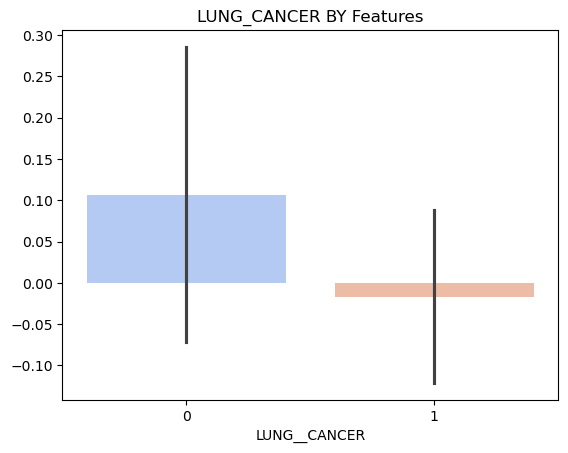

In [104]:
plt.title('LUNG_CANCER BY Features')
sns.barplot(data=data,x=Y,y=X_component,orient='v',palette='coolwarm')
plt.show()

In [105]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [106]:
smote=SMOTE(random_state=42)
x_train_oversampled,y_train_oversampled=smote.fit_resample(X=x_train,y=y_train)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7952\4217052281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_oversampled,palette='coolwarm')


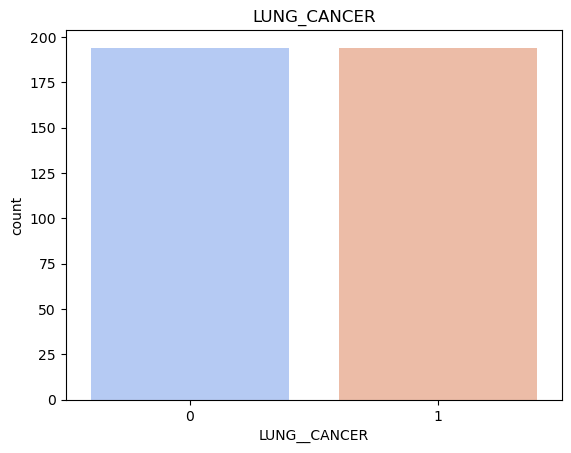

In [107]:
plt.title('LUNG_CANCER')
sns.countplot(x=y_train_oversampled,palette='coolwarm')
plt.show()

## Data Modeling And Evaluations

Logistic Regression Model

In [108]:
LR=LogisticRegression(penalty='l2',C=1.0,solver='liblinear',random_state=42)
LR.fit(x_train_oversampled,y_train_oversampled)

LogisticRegression(random_state=42, solver='liblinear')

In [109]:
predict_train=LR.predict(x_train_oversampled)
predict_test=LR.predict(x_test)

In [110]:
train_acc=accuracy_score(y_train_oversampled,predict_train)
test_acc=accuracy_score(y_test,predict_test)

In [111]:
print('Training Accuracy : ',round(train_acc*100,2),'%')
print('Testing  Accuracy : ',round(test_acc*100,2),'%')

Training Accuracy :  90.98 %
Testing  Accuracy :  89.29 %


In [112]:
precision=precision_score(y_test,predict_test)
recall=recall_score(y_test,predict_test)

In [113]:
print('Precision Score : ',round(precision*100,2),'%')
print('Recall Score    : ',round(recall*100,2),'%')

Precision Score :  95.24 %
Recall Score    :  90.91 %


In [114]:
report=classification_report(y_test,predict_test)
print('Classification Report : \n'+report)

Classification Report : 
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.95      0.91      0.93        44

    accuracy                           0.89        56
   macro avg       0.83      0.87      0.85        56
weighted avg       0.90      0.89      0.90        56



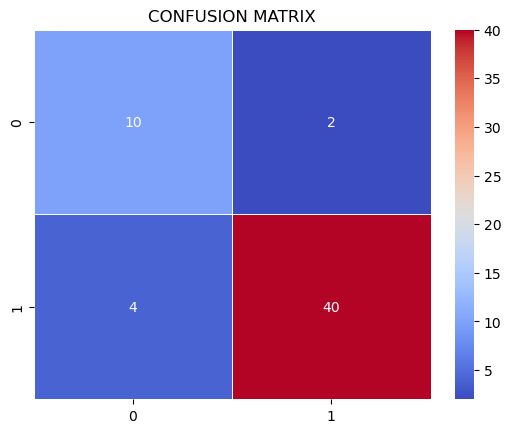

In [115]:
conf_mat=confusion_matrix(y_test,predict_test)
plt.title('CONFUSION MATRIX')
sns.heatmap(conf_mat,annot=True,cmap='coolwarm',linecolor='white',linewidths=0.5)
plt.show()

Applying Cross Validation on Logistic Regression Model

In [184]:
k=KFold(n_splits=5)
scores=cross_val_score(estimator=LR,X=x_train_oversampled,y=y_train_oversampled,cv=k)

In [186]:
avg_scores=scores.mean()
print("Scores            : ",scores)
print("Average Of Scores : ",round(avg_scores*100,2),'%')

Scores            :  [0.80769231 0.84615385 0.87179487 0.84415584 0.83116883]
Average Of Scores :  84.02 %


SVM Model

In [120]:
svm=SVC(C=1.0,kernel='rbf',random_state=42)
svm.fit(x_train_oversampled,y_train_oversampled)

SVC(random_state=42)

In [121]:
predict_train2=svm.predict(x_train_oversampled)
predict_test2=svm.predict(x_test)

In [122]:
train_acc2=accuracy_score(y_train_oversampled,predict_train2)
test_acc2=accuracy_score(y_test,predict_test2)

In [123]:
print('Training Accuracy : ',round(train_acc2*100,2),'%')
print('Testing  Accuracy : ',round(test_acc2*100,2),'%')

Training Accuracy :  95.88 %
Testing  Accuracy :  94.64 %


In [124]:
precision2=precision_score(y_test,predict_test2)
recall2=recall_score(y_test,predict_test2)

In [125]:
print('Precision Score : ',round(precision2*100,2),'%')
print('Recall Score    : ',round(recall2*100,2),'%')

Precision Score :  97.67 %
Recall Score    :  95.45 %


In [126]:
report2=classification_report(y_test,predict_test2)
print('Classification Report : \n'+report2)

Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.98      0.95      0.97        44

    accuracy                           0.95        56
   macro avg       0.91      0.94      0.92        56
weighted avg       0.95      0.95      0.95        56



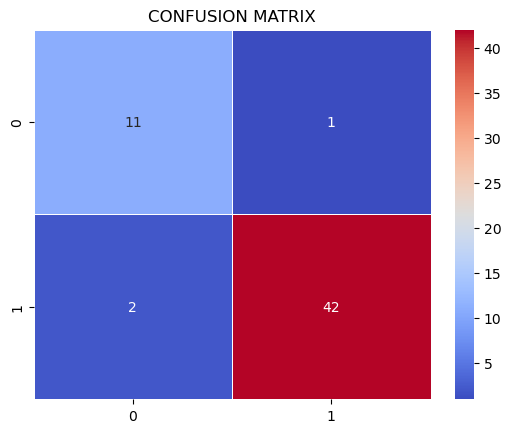

In [127]:
conf_mat2=confusion_matrix(y_test,predict_test2)
plt.title('CONFUSION MATRIX')
sns.heatmap(conf_mat2,annot=True,cmap='coolwarm',linecolor='white',linewidths=0.5)
plt.show()

Decision Tree Classifier Model

In [128]:
DT=DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=42)
DT.fit(x_train_oversampled,y_train_oversampled)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [129]:
predict_train3=DT.predict(x_train_oversampled)
predict_test3=DT.predict(x_test)

In [130]:
train_acc3=accuracy_score(y_train_oversampled,predict_train3)
test_acc3=accuracy_score(y_test,predict_test3)

In [131]:
print('Training Accuracy : ',round(train_acc3*100,2),'%')
print('Testing  Accuracy : ',round(test_acc3*100,2),'%')

Training Accuracy :  98.97 %
Testing  Accuracy :  98.21 %


In [132]:
precision3=precision_score(y_test,predict_test3)
recall3=recall_score(y_test,predict_test3)

In [133]:
print('Precision Score : ',round(precision3*100,2),'%')
print('Recall Score    : ',round(recall3*100,2),'%')

Precision Score :  97.78 %
Recall Score    :  100.0 %


In [134]:
report3=classification_report(y_test,predict_test3)
print('Classification Report : \n'+report3)

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.98      1.00      0.99        44

    accuracy                           0.98        56
   macro avg       0.99      0.96      0.97        56
weighted avg       0.98      0.98      0.98        56



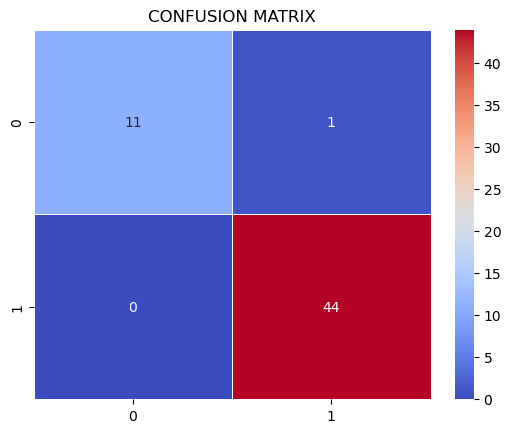

In [135]:
conf_mat3=confusion_matrix(y_test,predict_test3)
plt.title('CONFUSION MATRIX')
sns.heatmap(conf_mat3,annot=True,cmap='coolwarm',linecolor='white',linewidths=0.5)
plt.show()

Random Forest Classifier Model

In [136]:
RF=RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=10,random_state=42)
RF.fit(x_train_oversampled,y_train_oversampled)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [137]:
predict_train4=RF.predict(x_train_oversampled)
predict_test4=RF.predict(x_test)

In [138]:
train_acc4=accuracy_score(y_train_oversampled,predict_train4)
test_acc4=accuracy_score(y_test,predict_test4)

In [139]:
print('Training Accuracy : ',round(train_acc4*100,2),'%')
print('Testing  Accuracy : ',round(test_acc4*100,2),'%')

Training Accuracy :  98.97 %
Testing  Accuracy :  96.43 %


In [140]:
precision4=precision_score(y_test,predict_test4)
recall4=recall_score(y_test,predict_test4)

In [141]:
print('Precision Score : ',round(precision4*100,2),'%')
print('Recall Score    : ',round(recall4*100,2),'%')

Precision Score :  95.65 %
Recall Score    :  100.0 %


In [142]:
report4=classification_report(y_test,predict_test4)
print('Classification Report : \n'+report4)

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.96      1.00      0.98        44

    accuracy                           0.96        56
   macro avg       0.98      0.92      0.94        56
weighted avg       0.97      0.96      0.96        56



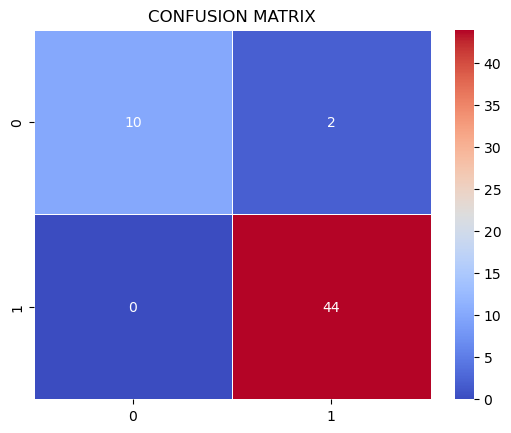

In [143]:
conf_mat4=confusion_matrix(y_test,predict_test4)
plt.title('CONFUSION MATRIX')
sns.heatmap(conf_mat4,annot=True,cmap='coolwarm',linecolor='white',linewidths=0.5)
plt.show()

Boosting Model

In [144]:
boost=AdaBoostClassifier(n_estimators=10,estimator=LR,random_state=42,learning_rate=0.01)
boost.fit(x_train_oversampled,y_train_oversampled)

c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=LogisticRegression(random_state=42,
                                                solver='liblinear'),
                   learning_rate=0.01, n_estimators=10, random_state=42)

In [145]:
predict_train5=boost.predict(x_train_oversampled)
predict_test5=boost.predict(x_test)

In [146]:
train_acc5=accuracy_score(y_train_oversampled,predict_train5)
test_acc5=accuracy_score(y_test,predict_test5)

In [147]:
print('Training Accuracy : ',round(train_acc5*100,2),'%')
print('Testing  Accuracy : ',round(test_acc5*100,2),'%')

Training Accuracy :  62.11 %
Testing  Accuracy :  80.36 %


In [148]:
precision5=precision_score(y_test,predict_test5)
recall5=recall_score(y_test,predict_test5)

In [149]:
print('Precision Score : ',round(precision5*100,2),'%')
print('Recall Score    : ',round(recall5*100,2),'%')

Precision Score :  80.0 %
Recall Score    :  100.0 %


In [150]:
report5=classification_report(y_test,predict_test5)
print('Classification Report : \n'+report5)

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        12
           1       0.80      1.00      0.89        44

    accuracy                           0.80        56
   macro avg       0.90      0.54      0.52        56
weighted avg       0.84      0.80      0.73        56



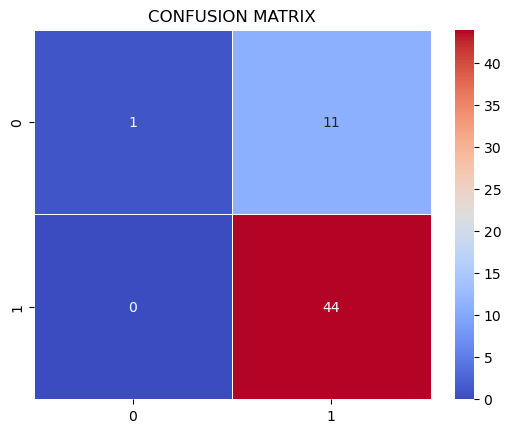

In [151]:
conf_mat5=confusion_matrix(y_test,predict_test5)
plt.title('CONFUSION MATRIX')
sns.heatmap(conf_mat5,annot=True,cmap='coolwarm',linecolor='white',linewidths=0.5)
plt.show()

Bagging Model

In [152]:
bagging=BaggingClassifier(n_estimators=10,estimator=LR,random_state=42)
bagging.fit(x_train_oversampled,y_train_oversampled)

BaggingClassifier(estimator=LogisticRegression(random_state=42,
                                               solver='liblinear'),
                  random_state=42)

In [153]:
predict_train6=bagging.predict(x_train_oversampled)
predict_test6=bagging.predict(x_test)

In [154]:
train_acc6=accuracy_score(y_train_oversampled,predict_train6)
test_acc6=accuracy_score(y_test,predict_test6)

In [155]:
print('Training Accuracy : ',round(train_acc6*100,2),'%')
print('Testing  Accuracy : ',round(test_acc6*100,2),'%')

Training Accuracy :  91.49 %
Testing  Accuracy :  89.29 %


In [156]:
precision6=precision_score(y_test,predict_test6)
recall6=recall_score(y_test,predict_test6)

In [157]:
print('Precision Score : ',round(precision6*100,2),'%')
print('Recall Score    : ',round(recall6*100,2),'%')

Precision Score :  95.24 %
Recall Score    :  90.91 %


In [158]:
report6=classification_report(y_test,predict_test6)
print('Classification Report : \n'+report6)

Classification Report : 
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.95      0.91      0.93        44

    accuracy                           0.89        56
   macro avg       0.83      0.87      0.85        56
weighted avg       0.90      0.89      0.90        56



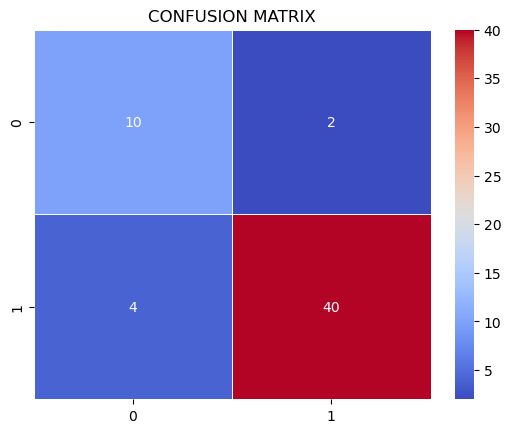

In [159]:
conf_mat6=confusion_matrix(y_test,predict_test6)
plt.title('CONFUSION MATRIX')
sns.heatmap(conf_mat6,annot=True,cmap='coolwarm',linecolor='white',linewidths=0.5)
plt.show()

KNN Model

In [164]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_oversampled,y_train_oversampled)

KNeighborsClassifier(n_neighbors=3)

In [165]:
predict_train7=knn.predict(x_train_oversampled)
predict_test7=knn.predict(x_test)

In [166]:
train_acc7=accuracy_score(y_train_oversampled,predict_train7)
test_acc7=accuracy_score(y_test,predict_test7)

In [167]:
print('Training Accuracy : ',round(train_acc7*100,2),'%')
print('Testing  Accuracy : ',round(test_acc7*100,2),'%')

Training Accuracy :  95.88 %
Testing  Accuracy :  91.07 %


In [168]:
precision7=precision_score(y_test,predict_test7)
recall7=recall_score(y_test,predict_test7)

In [169]:
print('Precision Score : ',round(precision7*100,2),'%')
print('Recall Score    : ',round(recall7*100,2),'%')

Precision Score :  100.0 %
Recall Score    :  88.64 %


In [170]:
report7=classification_report(y_test,predict_test7)
print('Classification Report : \n'+report7)

Classification Report : 
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       1.00      0.89      0.94        44

    accuracy                           0.91        56
   macro avg       0.85      0.94      0.88        56
weighted avg       0.94      0.91      0.92        56



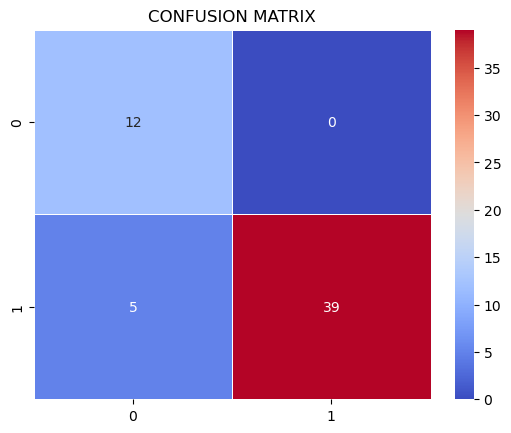

In [171]:
conf_mat7=confusion_matrix(y_test,predict_test7)
plt.title('CONFUSION MATRIX')
sns.heatmap(conf_mat7,annot=True,cmap='coolwarm',linecolor='white',linewidths=0.5)
plt.show()

Naive Bayes Classifier Model

In [172]:
NB=GaussianNB()
NB.fit(x_train_oversampled,y_train_oversampled)

GaussianNB()

In [174]:
predict_train8=NB.predict(x_train_oversampled)
predict_test8=NB.predict(x_test)

In [175]:
train_acc8=accuracy_score(y_train_oversampled,predict_train8)
test_acc8=accuracy_score(y_test,predict_test8)

In [176]:
print('Training Accuracy : ',round(train_acc8*100,2),'%')
print('Testing  Accuracy : ',round(test_acc8*100,2),'%')

Training Accuracy :  86.86 %
Testing  Accuracy :  89.29 %


In [177]:
precision8=precision_score(y_test,predict_test8)
recall8=recall_score(y_test,predict_test8)

In [178]:
print('Precision Score : ',round(precision8*100,2),'%')
print('Recall Score    : ',round(recall8*100,2),'%')

Precision Score :  93.18 %
Recall Score    :  93.18 %


In [179]:
report8=classification_report(y_test,predict_test8)
print('Classification Report : \n'+report8)

Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.93      0.93      0.93        44

    accuracy                           0.89        56
   macro avg       0.84      0.84      0.84        56
weighted avg       0.89      0.89      0.89        56



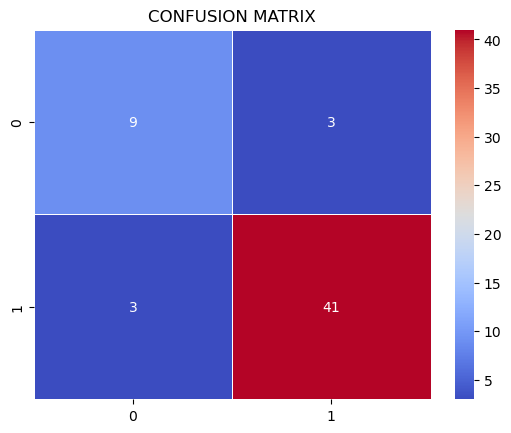

In [180]:
conf_mat8=confusion_matrix(y_test,predict_test8)
plt.title('CONFUSION MATRIX')
sns.heatmap(conf_mat8,annot=True,cmap='coolwarm',linecolor='white',linewidths=0.5)
plt.show()

## Saving Models

In [192]:
pickle.dump(LR,open(r'models\Logistic_Regression_Model.pkl','wb'))
pickle.dump(svm,open(r'models\SVM_Model.pkl','wb'))
pickle.dump(DT,open(r'models\Decision_Tree_Model.pkl','wb'))
pickle.dump(RF,open(r'models\Random_Forest_Model.pkl','wb'))
pickle.dump(boost,open(r'models\Boosting_Model.pkl','wb'))
pickle.dump(bagging,open(r'models\Bagging_Model.pkl','wb'))
pickle.dump(knn,open(r'models\KNN_Model.pkl','wb'))
pickle.dump(NB,open(r'models\Naive_Bayes_Model.pkl','wb'))

## Loading Models

In [193]:
def load_models():
    LR=pickle.load(open(r'models\Logistic_Regression_Model.pkl','rb'))
    svm=pickle.load(open(r'models\SVM_Model.pkl','rb'))
    DT=pickle.load(open(r'models\Decision_Tree_Model.pkl','rb'))
    RF=pickle.load(open(r'models\Random_Forest_Model.pkl','rb'))
    boost=pickle.load(open(r'models\Boosting_Model.pkl','rb'))
    bagging=pickle.load(open(r'models\Bagging_Model.pkl','rb'))
    knn=pickle.load(open(r'models\KNN_Model.pkl','rb'))
    NB=pickle.load(open(r'models\Naive_Bayes_Model.pkl','rb'))
    return LR,svm,DT,RF,boost,bagging,knn,NB

In [194]:
LR,svm,DT,RF,boost,bagging,knn,NB=load_models()

## Saving Label Encoders and Scalers

In [195]:
pickle.dump(labels,open(r'lbls&scalers\Label_Encoders.pkl','wb'))
pickle.dump(scalers,open(r'lbls&scalers\Scalers.pkl','wb'))

## Loading Label Encoders and Scalers

In [196]:
def load_lbls_scalers():
    labels=pickle.load(open(r'lbls&scalers\Label_Encoders.pkl','rb'))
    scalers=pickle.load(open(r'lbls&scalers\Scalers.pkl','rb'))
    return labels,scalers

In [197]:
labels,scalers=load_lbls_scalers()